# Other
Notebook to dig up stats for the MS <br>
Cascade Tuholske, Feb 2021

In [70]:
# Dependencies
import geopandas as gpd
import pandas as np
import numpy as np
import glob
import rasterio
import matplotlib.pyplot as plt

### Admin Units

In [4]:
print('How many admin units are there?')
df_in = '/Users/cascade/Github/PopGridCompare/data/raw/GPWv4-boundaries/gwpv4_zwe_admin2.shp'
df = gpd.read_file(df_in)
print('For ZWE', len(df))

How many admin units are there?
For ZWE 91


In [5]:
print('How many admin units are there?')
df_in = '/Users/cascade/Github/PopGridCompare/data/raw/GPWv4-boundaries/gwpv4_npl_admin4.shp'
df = gpd.read_file(df_in)
print('For NPL', len(df))

How many admin units are there?
For NPL 3990


In [6]:
print('How many admin units are there?')
df_in = '/Users/cascade/Github/PopGridCompare/data/raw/GPWv4-boundaries/gwpv4_mwi_admin3.shp'
df = gpd.read_file(df_in)
print('For mwi', len(df))

How many admin units are there?
For mwi 12647


In [8]:
print('How many admin units are there?')
df_in = '/Users/cascade/Github/PopGridCompare/data/raw/GPWv4-boundaries/gwpv4_moz_admin3.shp'
df = gpd.read_file(df_in)
print('For moz', len(df))

How many admin units are there?
For moz 413


In [9]:
print('How many admin units are there?')
df_in = '/Users/cascade/Github/PopGridCompare/data/raw/GPWv4-boundaries/gwpv4_ecu_admin3.shp'
df = gpd.read_file(df_in)
print('For ecu', len(df))

How many admin units are there?
For ecu 1047


## Rural Urban

In [99]:
def get_data(rst_fns):
    "Finds agreement among rasters"

    # Open rasters and get arrays
    arrs = []
    for rst in rst_fns:
        arr = rasterio.open(rst).read(1)
        arrs.append(arr)
    
    # find areas of agreement
    zeros = []
    for arr in arrs:
        zero = arr > -999
        zero = zero.astype(int)
        zeros.append(zero)

    agg = sum(zeros)
    #out = agg >= 5
    
    return agg.astype(int)

In [91]:
PATH = '/Users/cascade/Github/PopGridCompare/data/interim/'

In [92]:
# Start with rural Nepal
data_list = glob.glob(PATH+'*urban_NPL.tif')

In [93]:
data_list

['/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_urban_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_urban_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GHS15_urban_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/LS15_urban_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_urban_NPL.tif']

In [100]:
out = get_data(data_list)

In [101]:
np.unique(out, return_counts=True)

(array([0, 4, 5]), array([286598,      4, 195552]))

In [63]:
mgup_fn = PATH+'MGUP15_2015-km-matched-NPL.tif'
mgup_arr = rasterio.open(mgup_fn).read(1)

In [72]:
area_fn = PATH+'NPL-rst.tif'
area_arr = rasterio.open(area_fn).read(1)

In [80]:
np.unique(mgup_arr + area_arr, return_counts=True)

(array([-999., -998.,    2.], dtype=float32), array([286598, 195281,    275]))

In [78]:
out = mgup_arr + area_arr

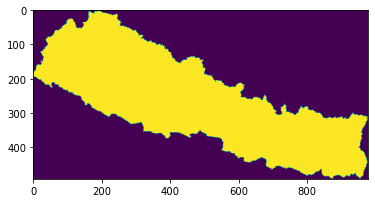

In [74]:
plt.imshow(area_arr)

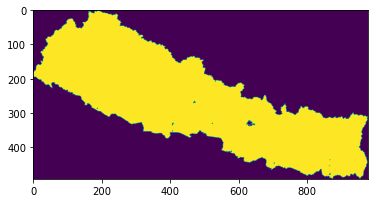

In [81]:
urban = out == -998
plt.imshow(urban.astype(int))

In [77]:
urban

False